In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_excel('EDA_dataset.xlsx', thousands=',')

In [3]:
# 전체 승차중 무임 비율 어느정도인지 확인하는 column 생성

df['무임비율'] = df['무임승차'] / (df['유임승차'] + df['무임승차'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호선                  298 non-null    object 
 1   역이름                 298 non-null    object 
 2   유임승차                298 non-null    int64  
 3   무임승차                298 non-null    int64  
 4   유임하차                298 non-null    int64  
 5   무임하차                298 non-null    int64  
 6   출퇴근시간 이용객수          298 non-null    float64
 7   출퇴근시간 제외한 이용객수      298 non-null    float64
 8   역별승강기               298 non-null    int64  
 9   역간거리(km)            298 non-null    float64
 10  지역                  298 non-null    object 
 11  노인인구수               298 non-null    int64  
 12  인구수(사분위수)           298 non-null    int64  
 13  인구밀도 (명/㎢)          298 non-null    int64  
 14  지역별통근인원비율(12세 이상)   298 non-null    float64
 15  지역내총생산(2016)(백만원)   298 non-null    int64  
 16  기초생활수급자 

In [5]:
# 수치형 변수 통계자료 확인

df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
유임승차,298.0,3.533565e+05,3.003806e+05,4.000000e+00,1.658720e+05,2.701235e+05,4.333365e+05,2.055521e+06
무임승차,298.0,7.034866e+04,4.944487e+04,0.000000e+00,3.646825e+04,5.937300e+04,8.777300e+04,2.996170e+05
유임하차,298.0,3.553363e+05,3.061721e+05,0.000000e+00,1.603520e+05,2.665200e+05,4.542015e+05,2.039847e+06
무임하차,298.0,6.950665e+04,4.882235e+04,0.000000e+00,3.579150e+04,5.945750e+04,8.784275e+04,2.819850e+05
출퇴근시간 이용객수,298.0,3.095892e+05,2.527668e+05,2.437500e+00,1.485651e+05,2.422759e+05,3.823271e+05,1.629976e+06
출퇴근시간 제외한 이용객수,298.0,6.247881e+05,5.475762e+05,4.125000e+00,2.782528e+05,4.659975e+05,7.508656e+05,3.858467e+06
역별승강기,298.0,1.078859e+01,6.943175e+00,0.000000e+00,6.000000e+00,9.000000e+00,1.500000e+01,3.900000e+01
역간거리(km),298.0,1.104430e+00,4.097250e-01,6.000000e-01,9.000000e-01,1.000000e+00,1.200000e+00,4.400000e+00
노인인구수,298.0,6.730931e+04,2.278826e+04,2.494800e+04,5.357225e+04,6.781500e+04,8.716750e+04,1.010860e+05
인구수(사분위수),298.0,2.593960e+00,1.236195e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00


In [6]:
# null 값 없는 것 확인
df.isnull().sum()

호선                    0
역이름                   0
유임승차                  0
무임승차                  0
유임하차                  0
무임하차                  0
출퇴근시간 이용객수            0
출퇴근시간 제외한 이용객수        0
역별승강기                 0
역간거리(km)              0
지역                    0
노인인구수                 0
인구수(사분위수)             0
인구밀도 (명/㎢)            0
지역별통근인원비율(12세 이상)     0
지역내총생산(2016)(백만원)     0
기초생활수급자               0
자치구별 재난지원금 대상자 비율     0
석유사용량(bbl)            0
지역별 도로면적              0
교통안전지수                0
자동차수                  0
통근 통학시 지하철 이용 비율      0
250m내 버스정류장 수         0
자치구별 지하철역 개수          0
무임비율                  0
dtype: int64

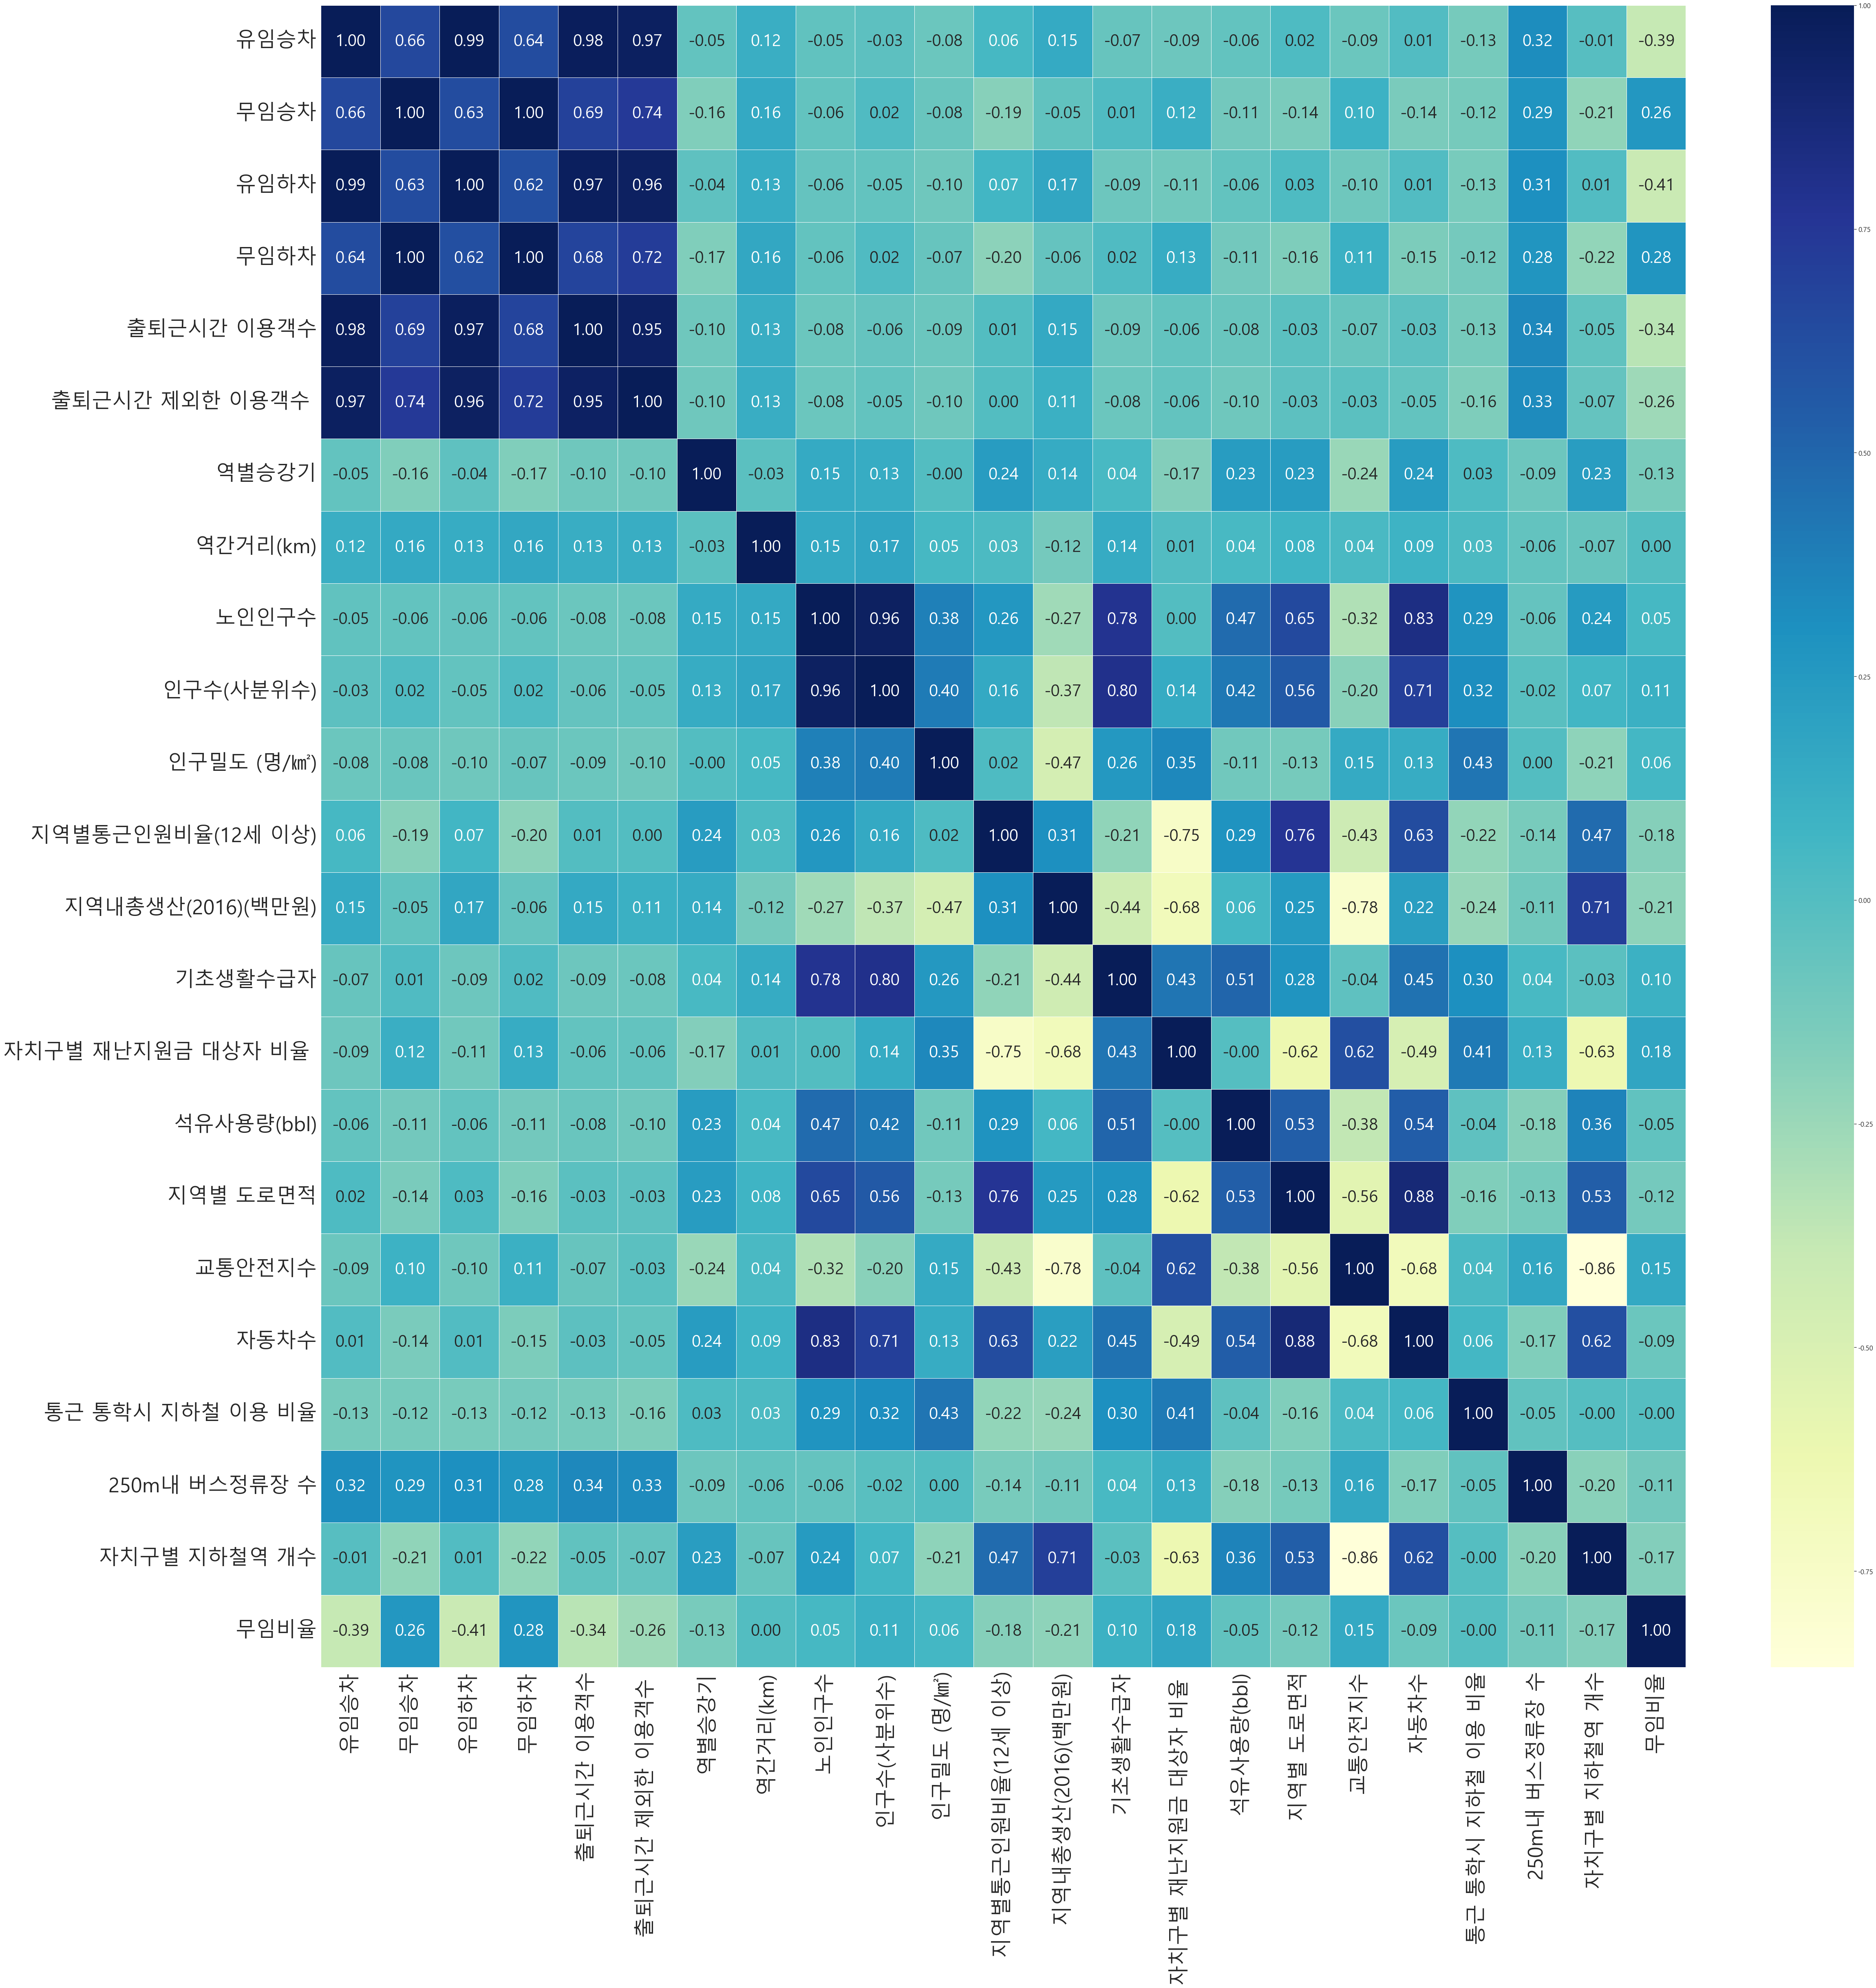

In [7]:
# 전체적인 상관계수

fig, ax = plt.subplots(figsize=(75,75))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':40}, fmt='0.2f', cmap="YlGnBu", linewidths=0.5)
ax.tick_params(axis='both', labelsize=50);

# -호선별

In [8]:
# 호선별 유무임승차

In [9]:
col = ['무임승차', '무임하차']

<AxesSubplot:xlabel='호선'>

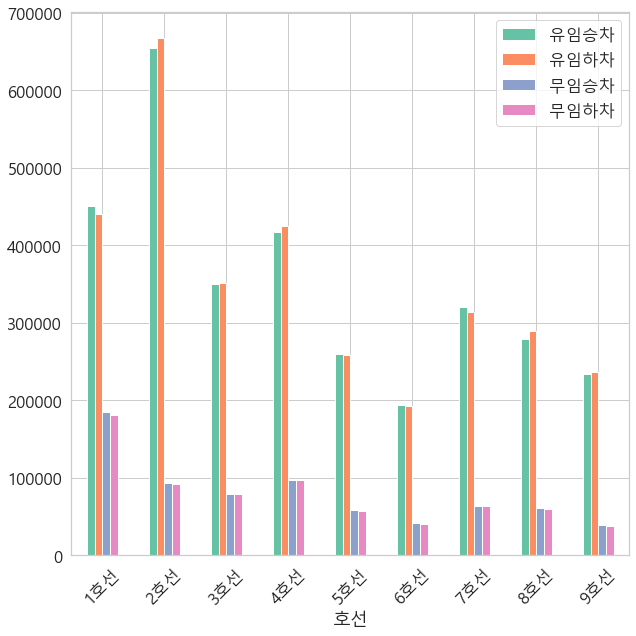

In [10]:
a = df.groupby(['호선']).agg({'유임승차':'mean'}).join(df.groupby(['호선']).agg({'유임하차':'mean'}))

for i in col:
    a = a.join(df.groupby(['호선']).agg({i:'mean'}))
    
a.plot(kind='bar', figsize=(10,10), rot=45)

<AxesSubplot:xlabel='호선', ylabel='무임승차'>

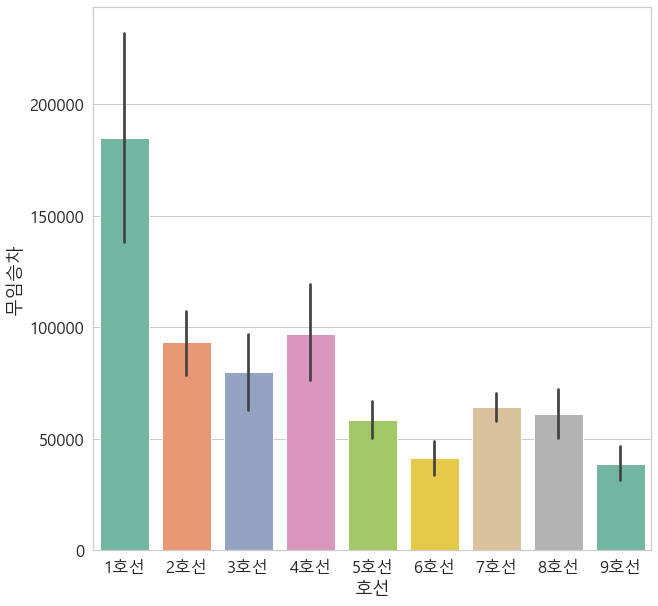

In [11]:
plt.figure(figsize=(10,10))
sns.barplot(x='호선', y='무임승차', data=df)

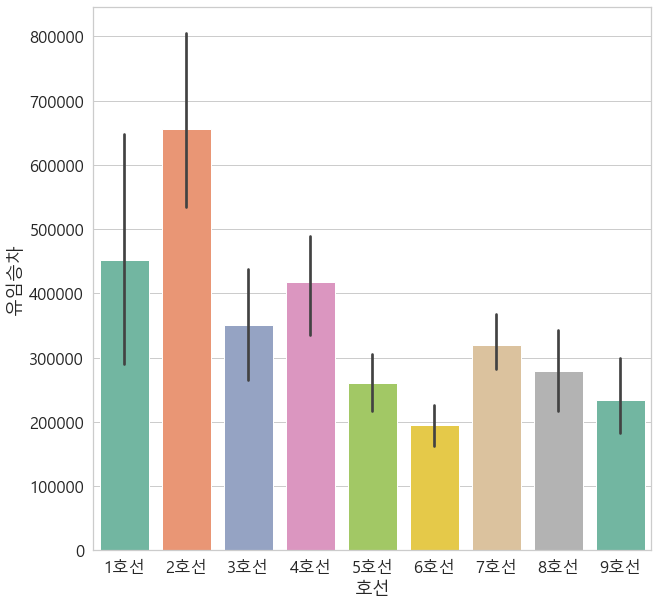

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(x='호선', y='유임승차', data=df);

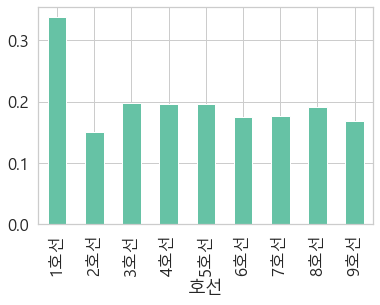

In [13]:
df.groupby('호선')['무임비율'].mean().plot(kind='bar');

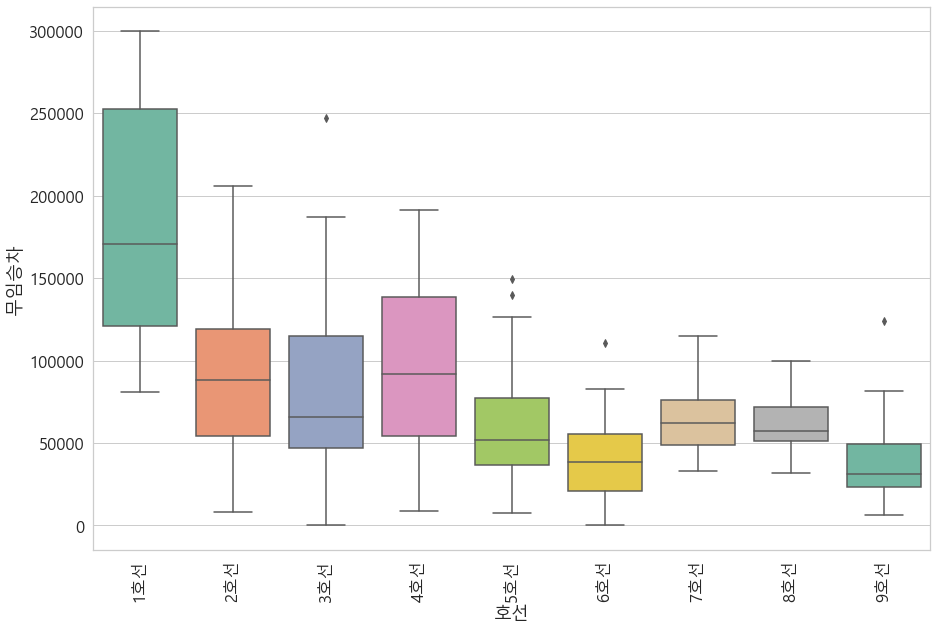

In [14]:
# 호선별 무임승차 boxplot

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x='호선', y='무임승차', data=df);

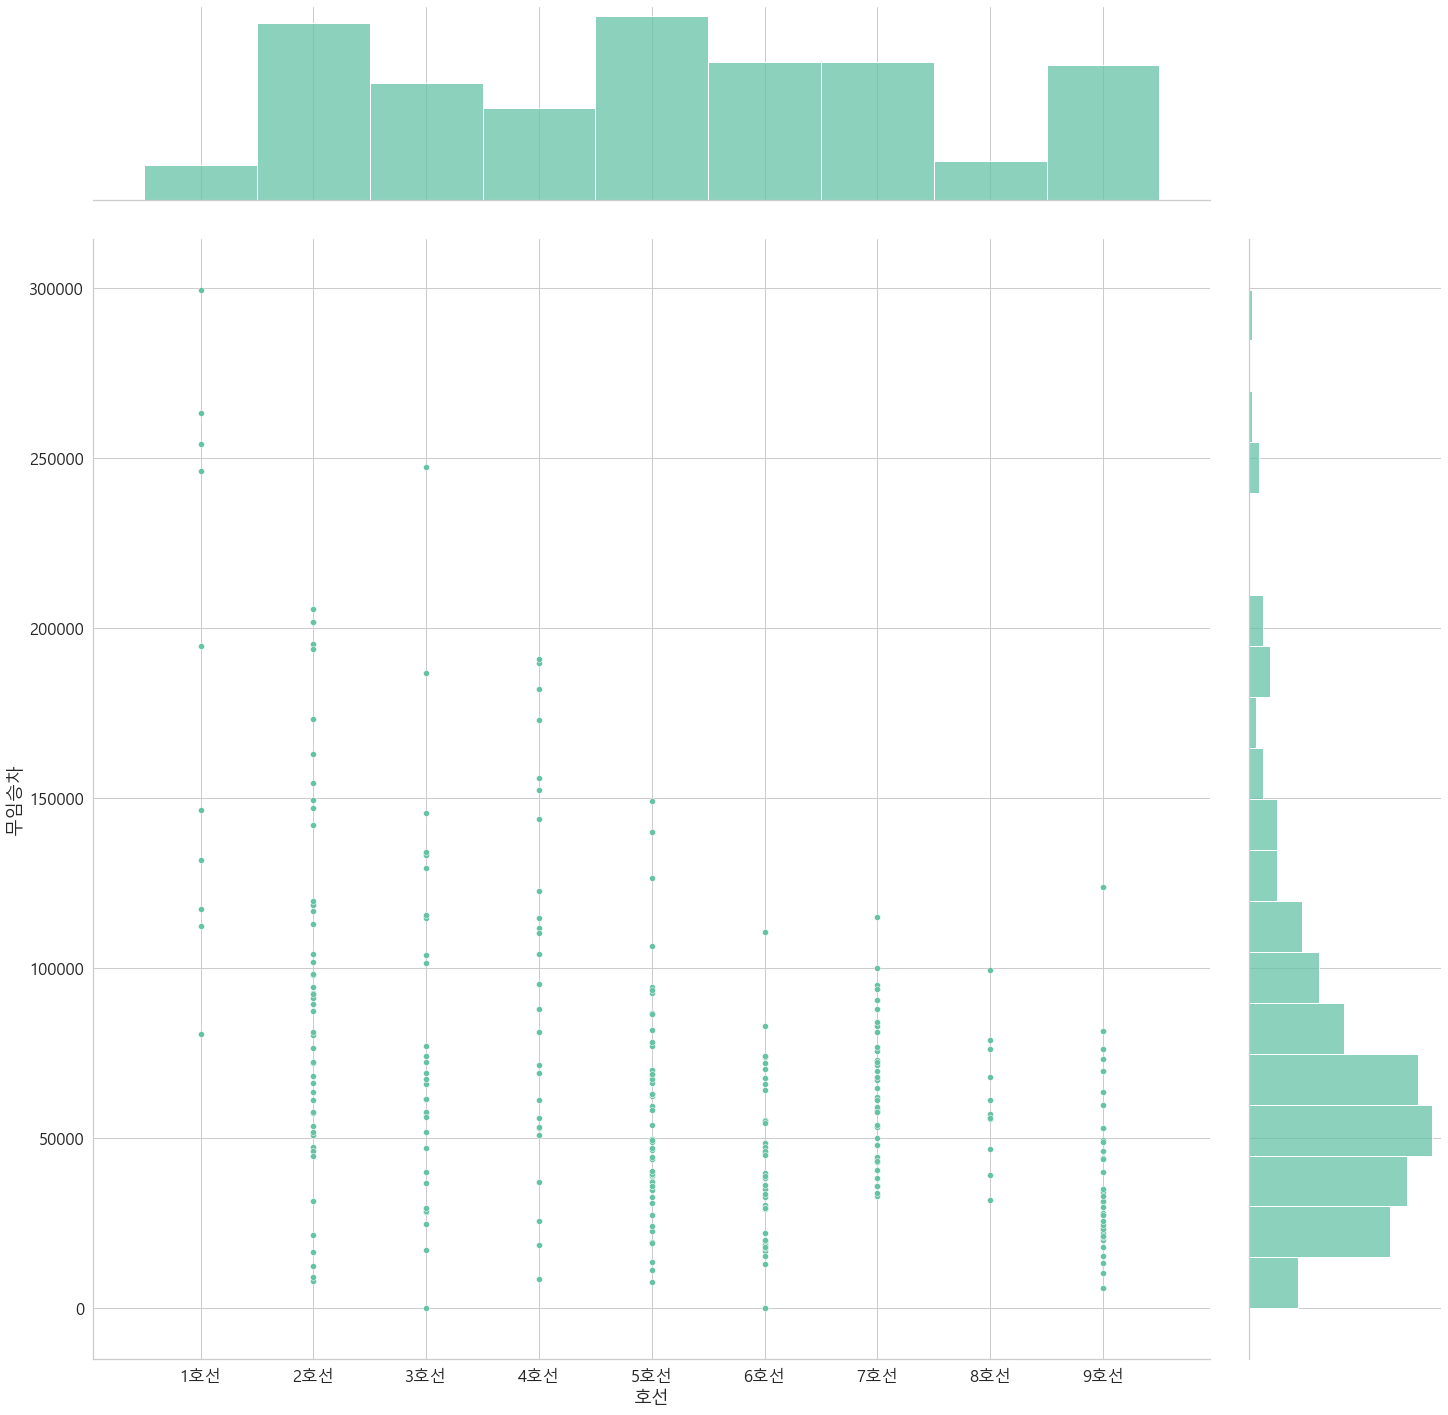

In [15]:
# 그래프에 점 하나가 역 하나임.
sns.jointplot(x='호선', y='무임승차', kind='scatter', height=20, data=df);

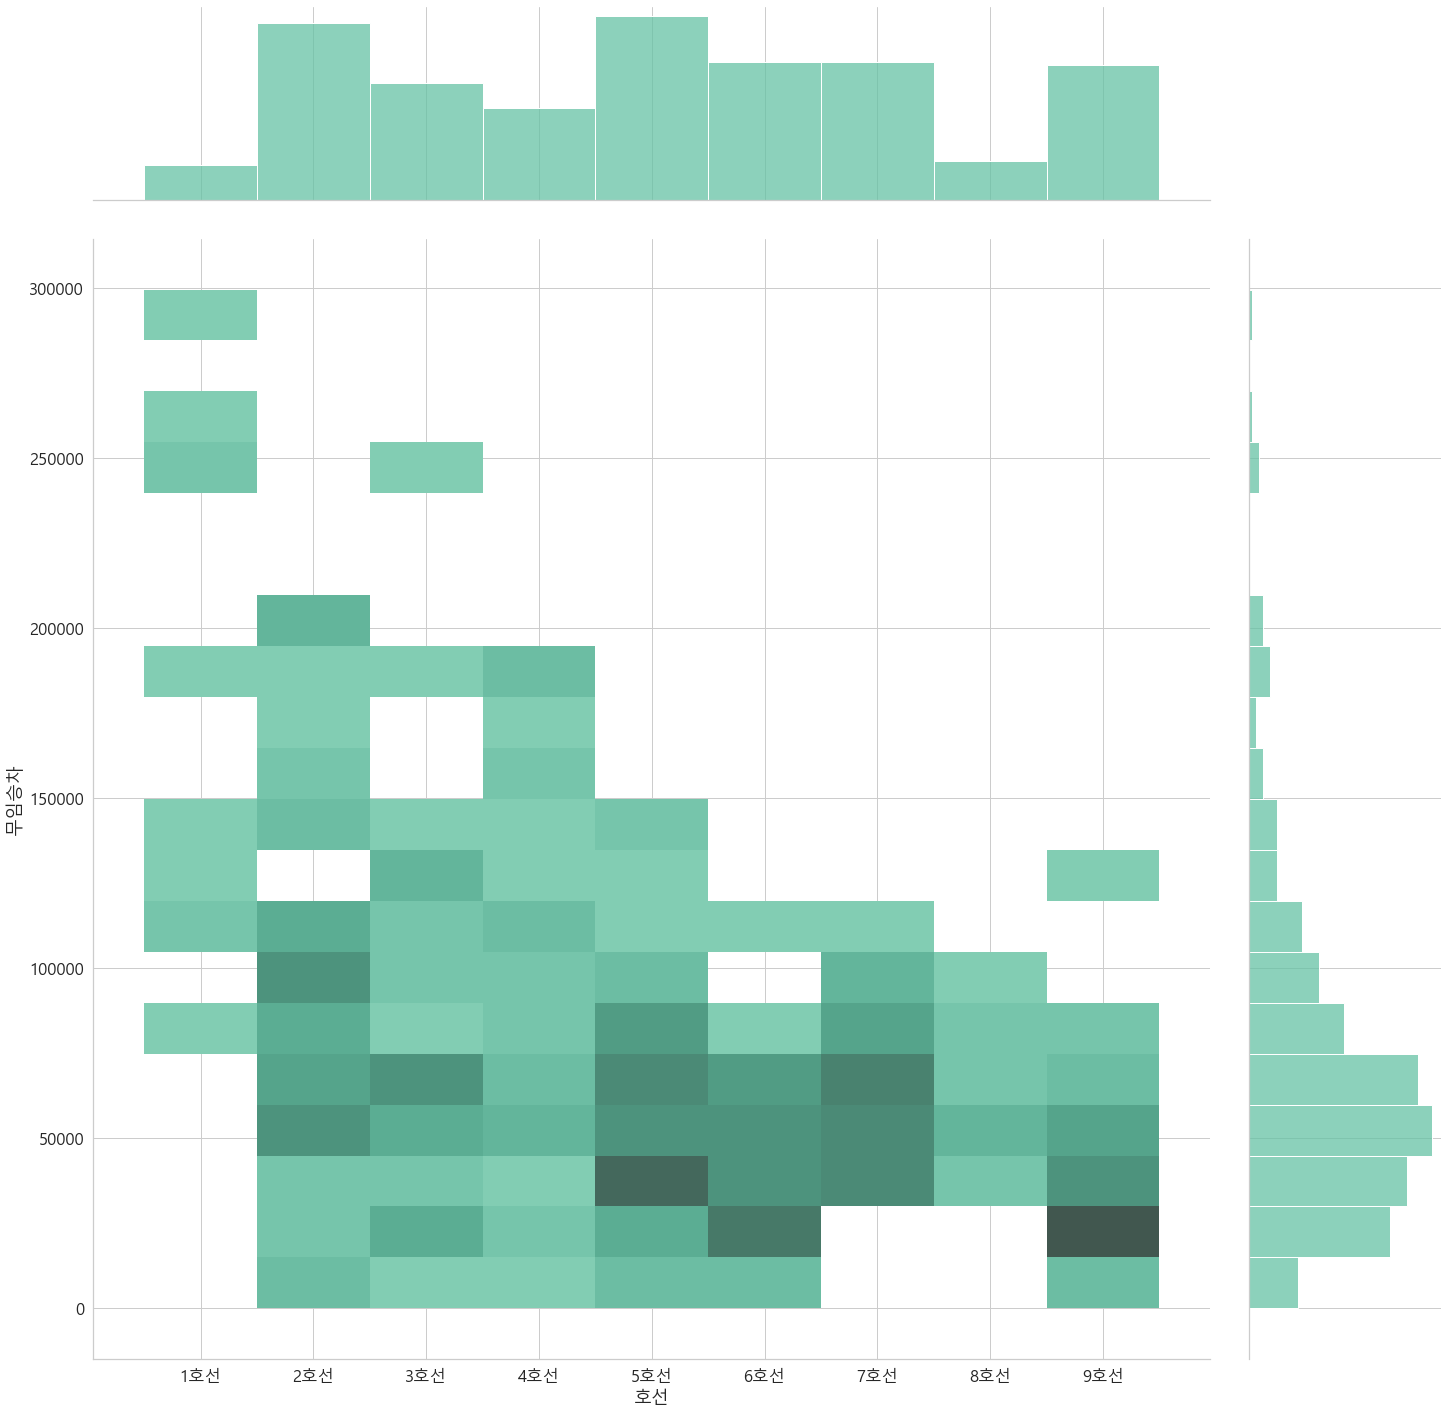

In [16]:
sns.jointplot(x='호선', y='무임승차', kind='hist', height=20, data=df);

# -지역별

In [17]:
# 지역별 유무임승차

col = ['무임승차', '무임하차']
a = df.groupby(['지역']).agg({'유임승차':'mean'}).join(df.groupby(['지역']).agg({'유임하차':'mean'}))

for i in col:
    a = a.join(df.groupby(['지역']).agg({i:'mean'}))

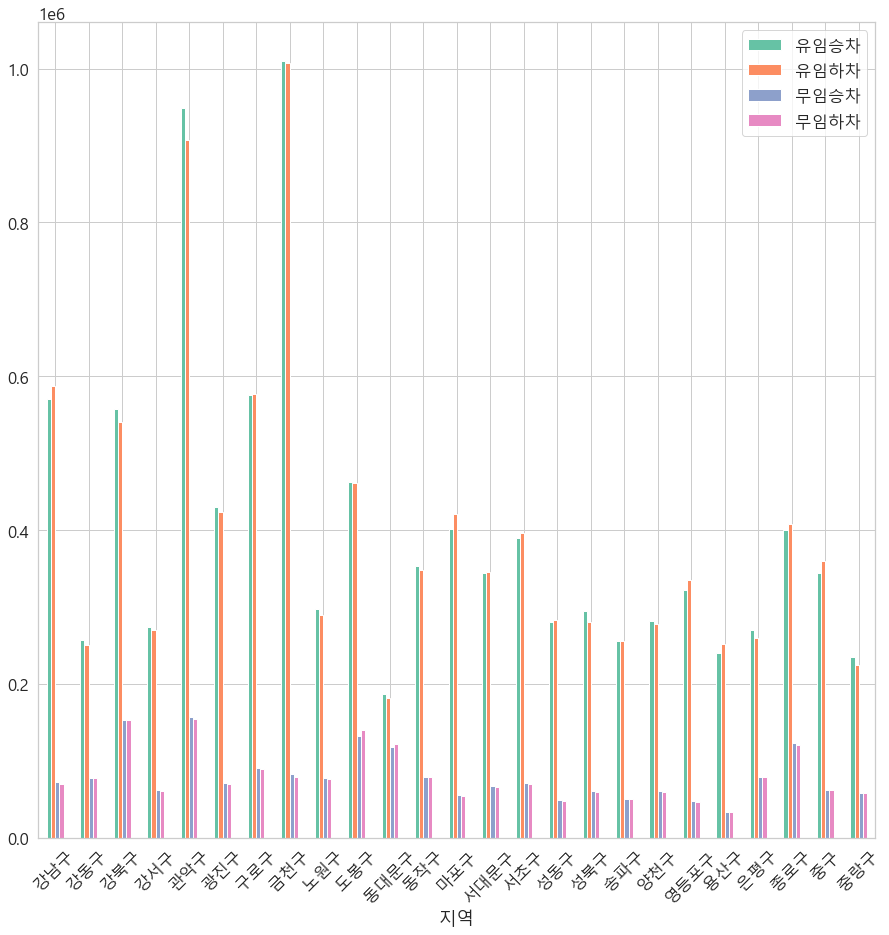

In [18]:
a.plot(kind='bar', figsize=(15,15), rot=45);

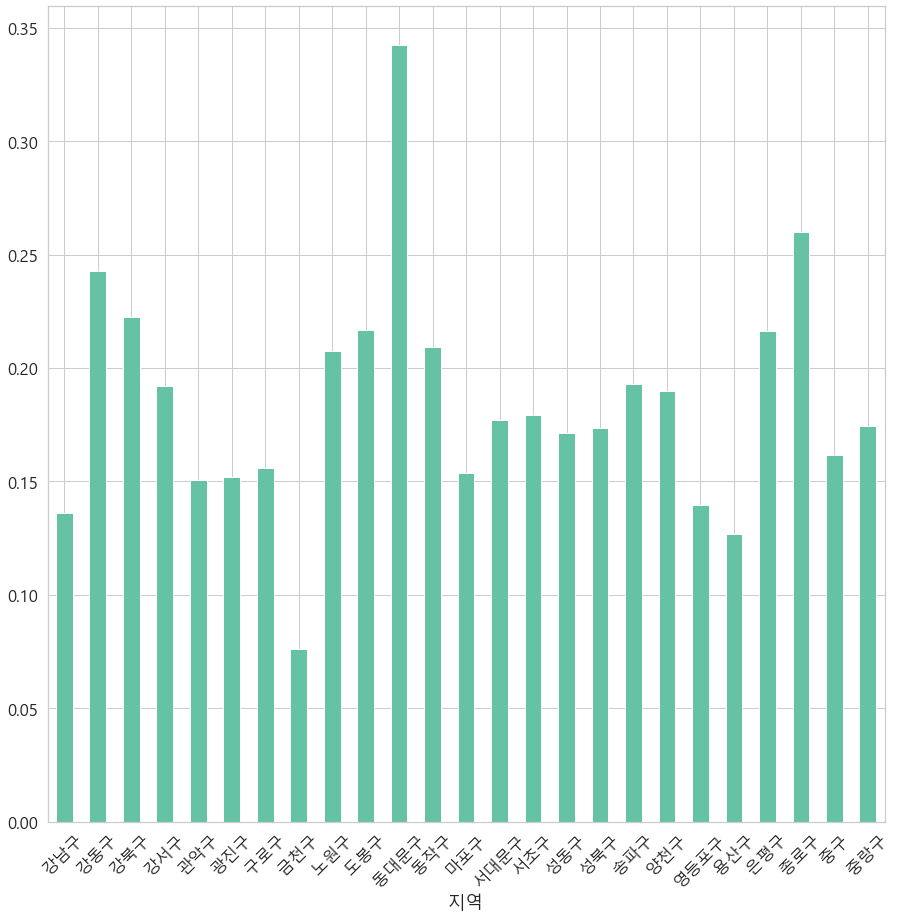

In [19]:
# 지역별 무임비율
df.groupby('지역')['무임비율'].mean().plot(kind='bar', figsize=(15,15), rot=45);

# -역별

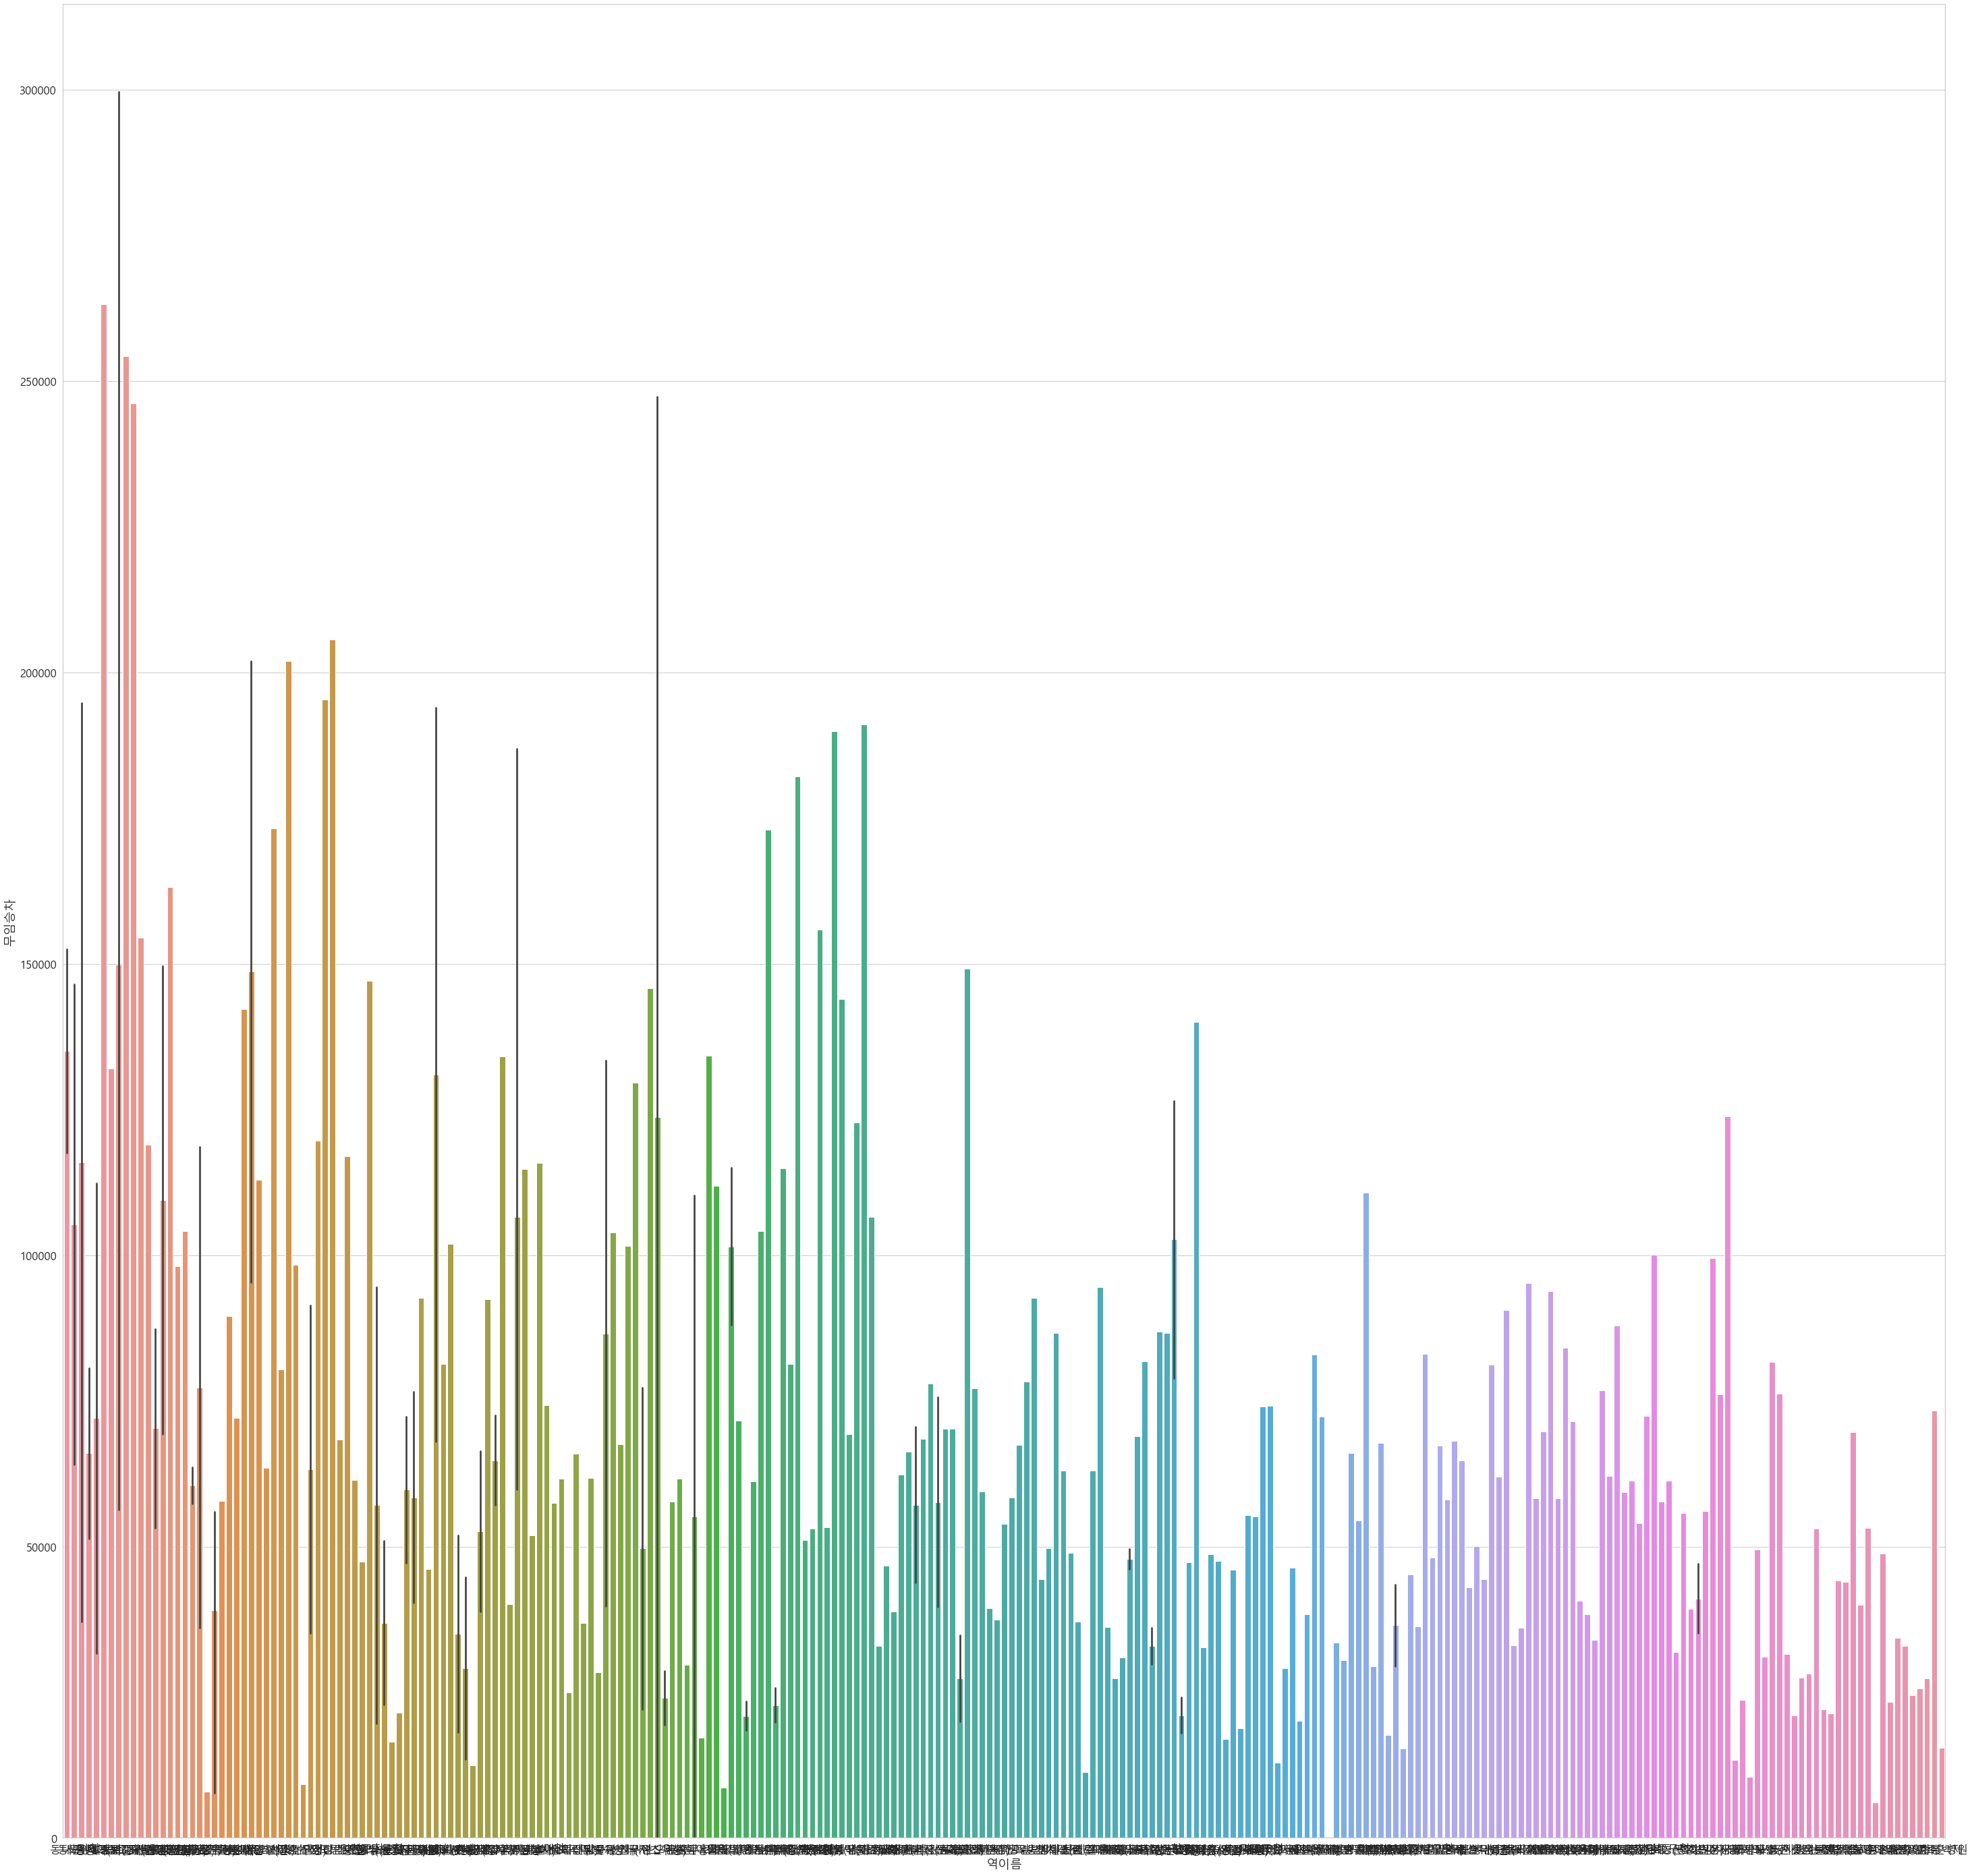

In [20]:
# 역별 무임승차 수치

plt.figure(figsize=(50,50))
sns.barplot(x='역이름', y='무임승차', data=df);

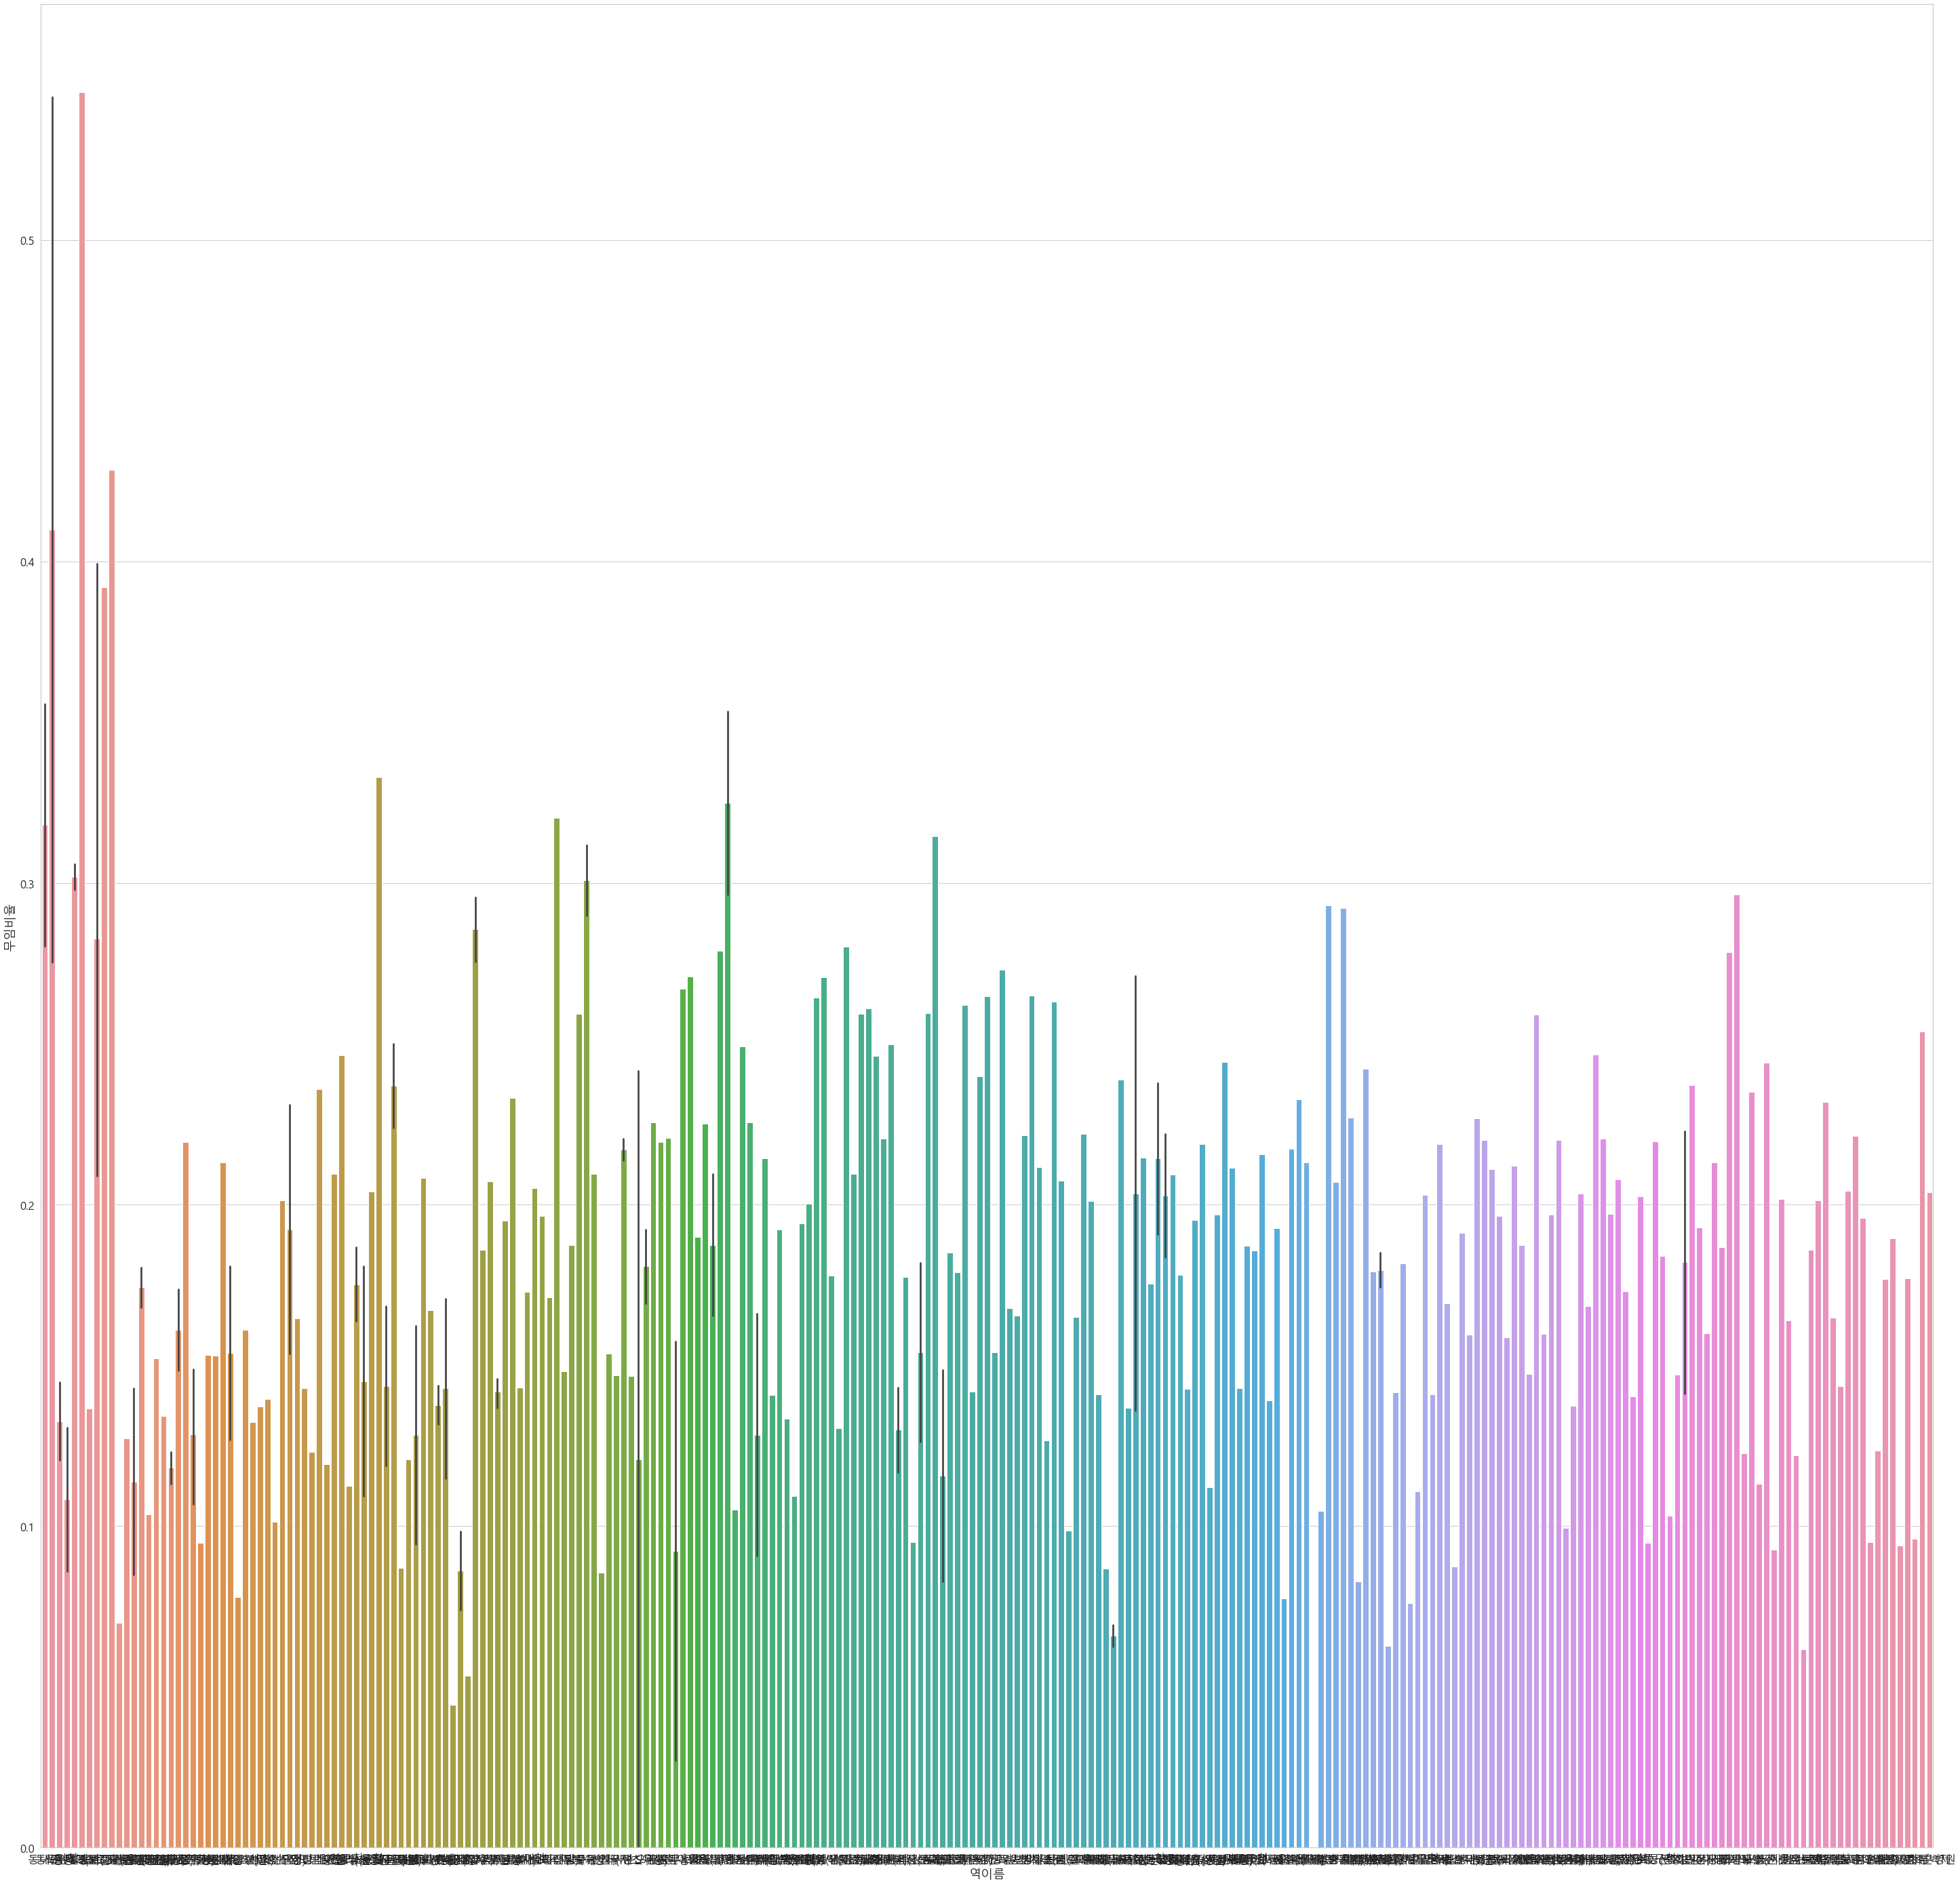

In [21]:
# 역별 무임비율

plt.figure(figsize=(50,50))
sns.barplot(x='역이름', y='무임비율', data=df);

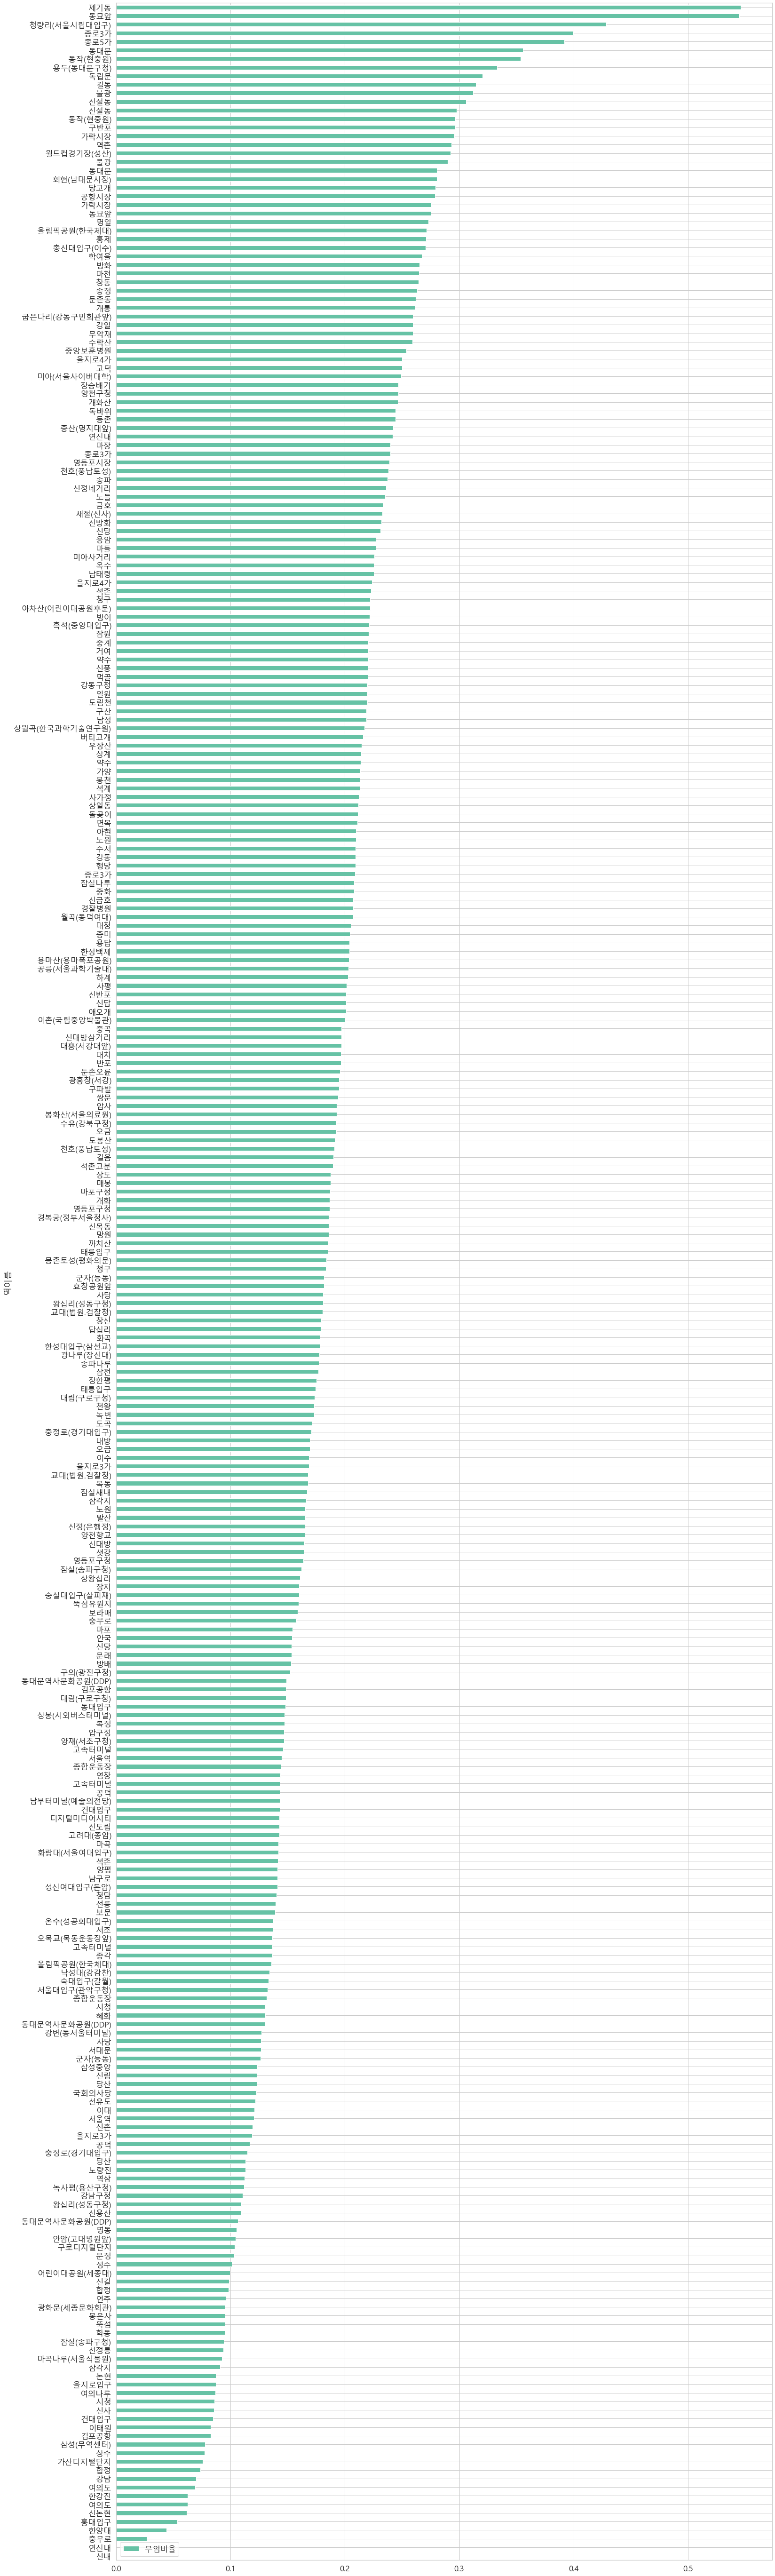

In [22]:
# 역별 무임비율 높은순으로 정렬
df.loc[:,['역이름','무임비율']].set_index('역이름').sort_values('무임비율',ascending=True).plot(kind='barh',figsize=(25,100));

In [23]:
df.loc[:,['역이름','무임비율']].sort_values('무임비율', ascending=False)[:5]

,역이름,무임비율
5,제기동,0.546053
1,동묘앞,0.544614
9,청량리(서울시립대입구),0.428520
7,종로3가,0.399524
8,종로5가,0.391943


In [24]:
df.loc[:,['역이름','무임비율']].sort_values('무임비율', ascending=False)[-5:]

,역이름,무임비율
59,홍대입구,0.053415
57,한양대,0.044303
90,충무로,0.027027
192,신내,0.000000
197,연신내,0.000000


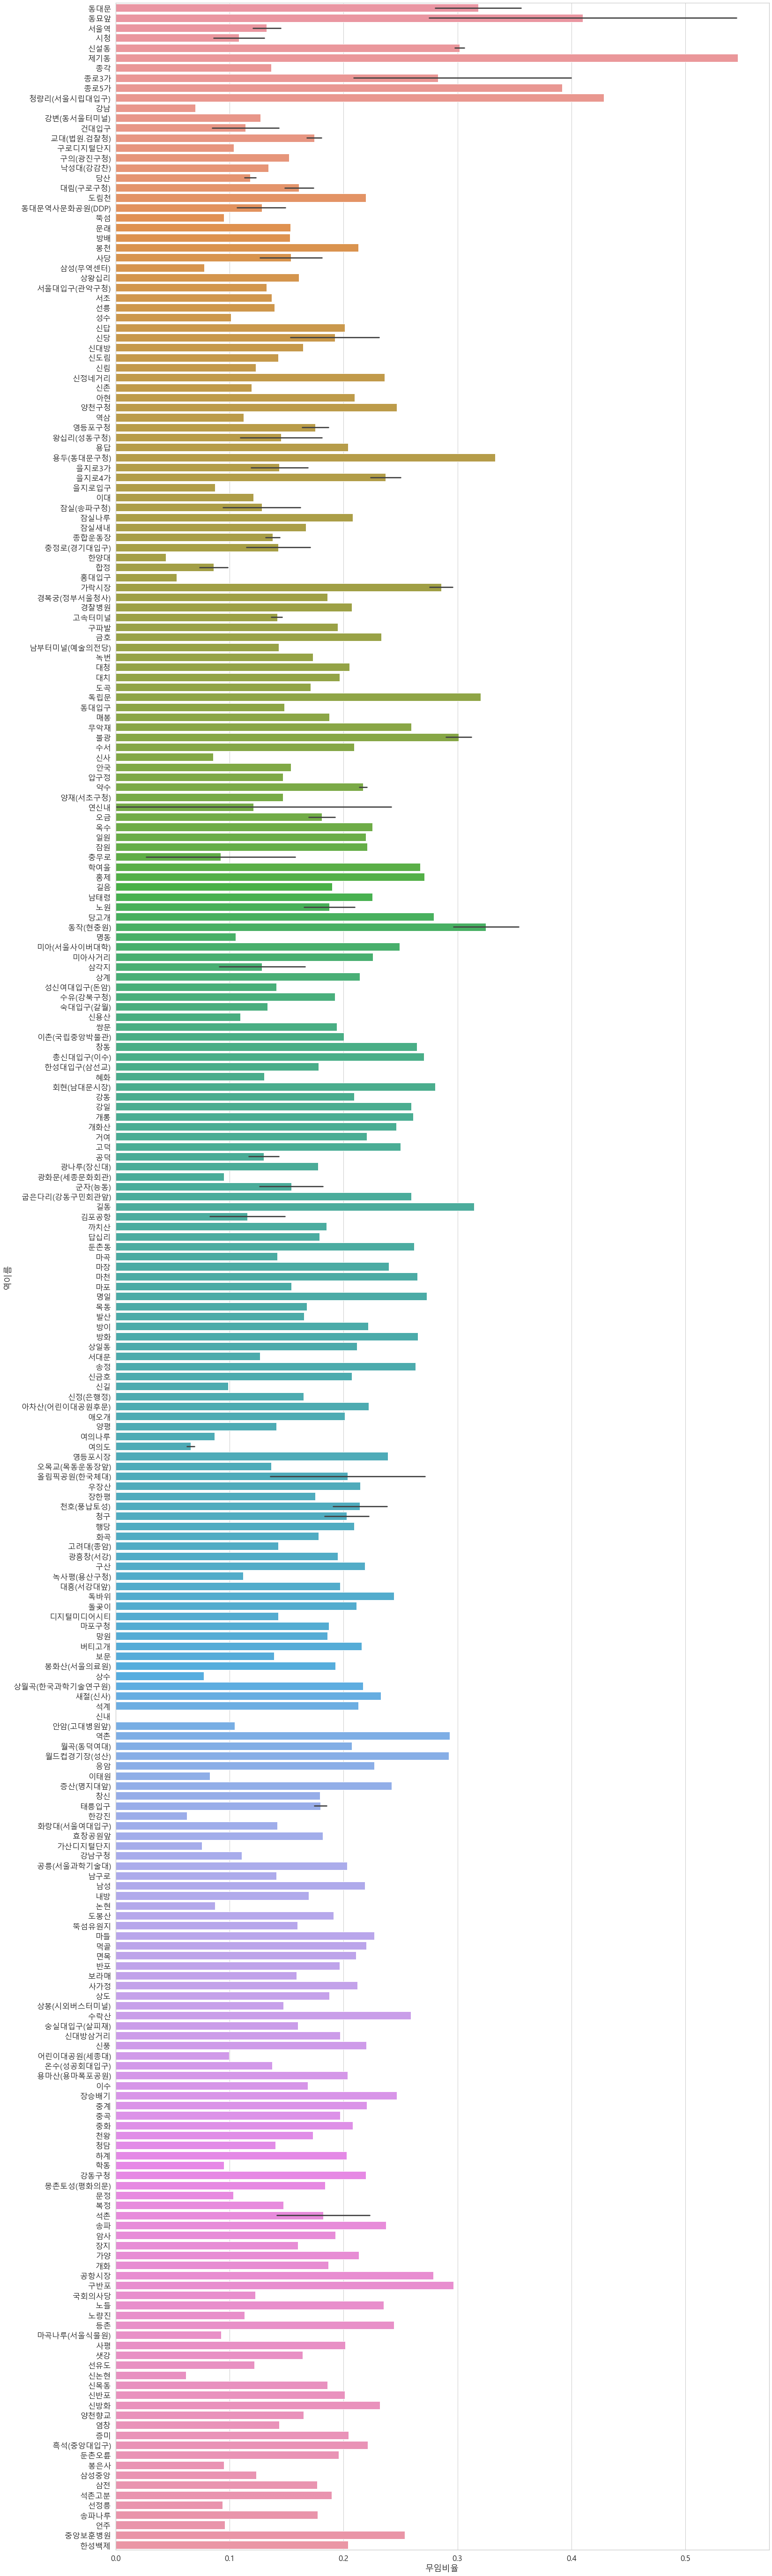

In [25]:
a = df.loc[:,['역이름','무임비율']]

plt.figure(figsize=(25,100))
sns.barplot(data=a, y='역이름', x='무임비율');

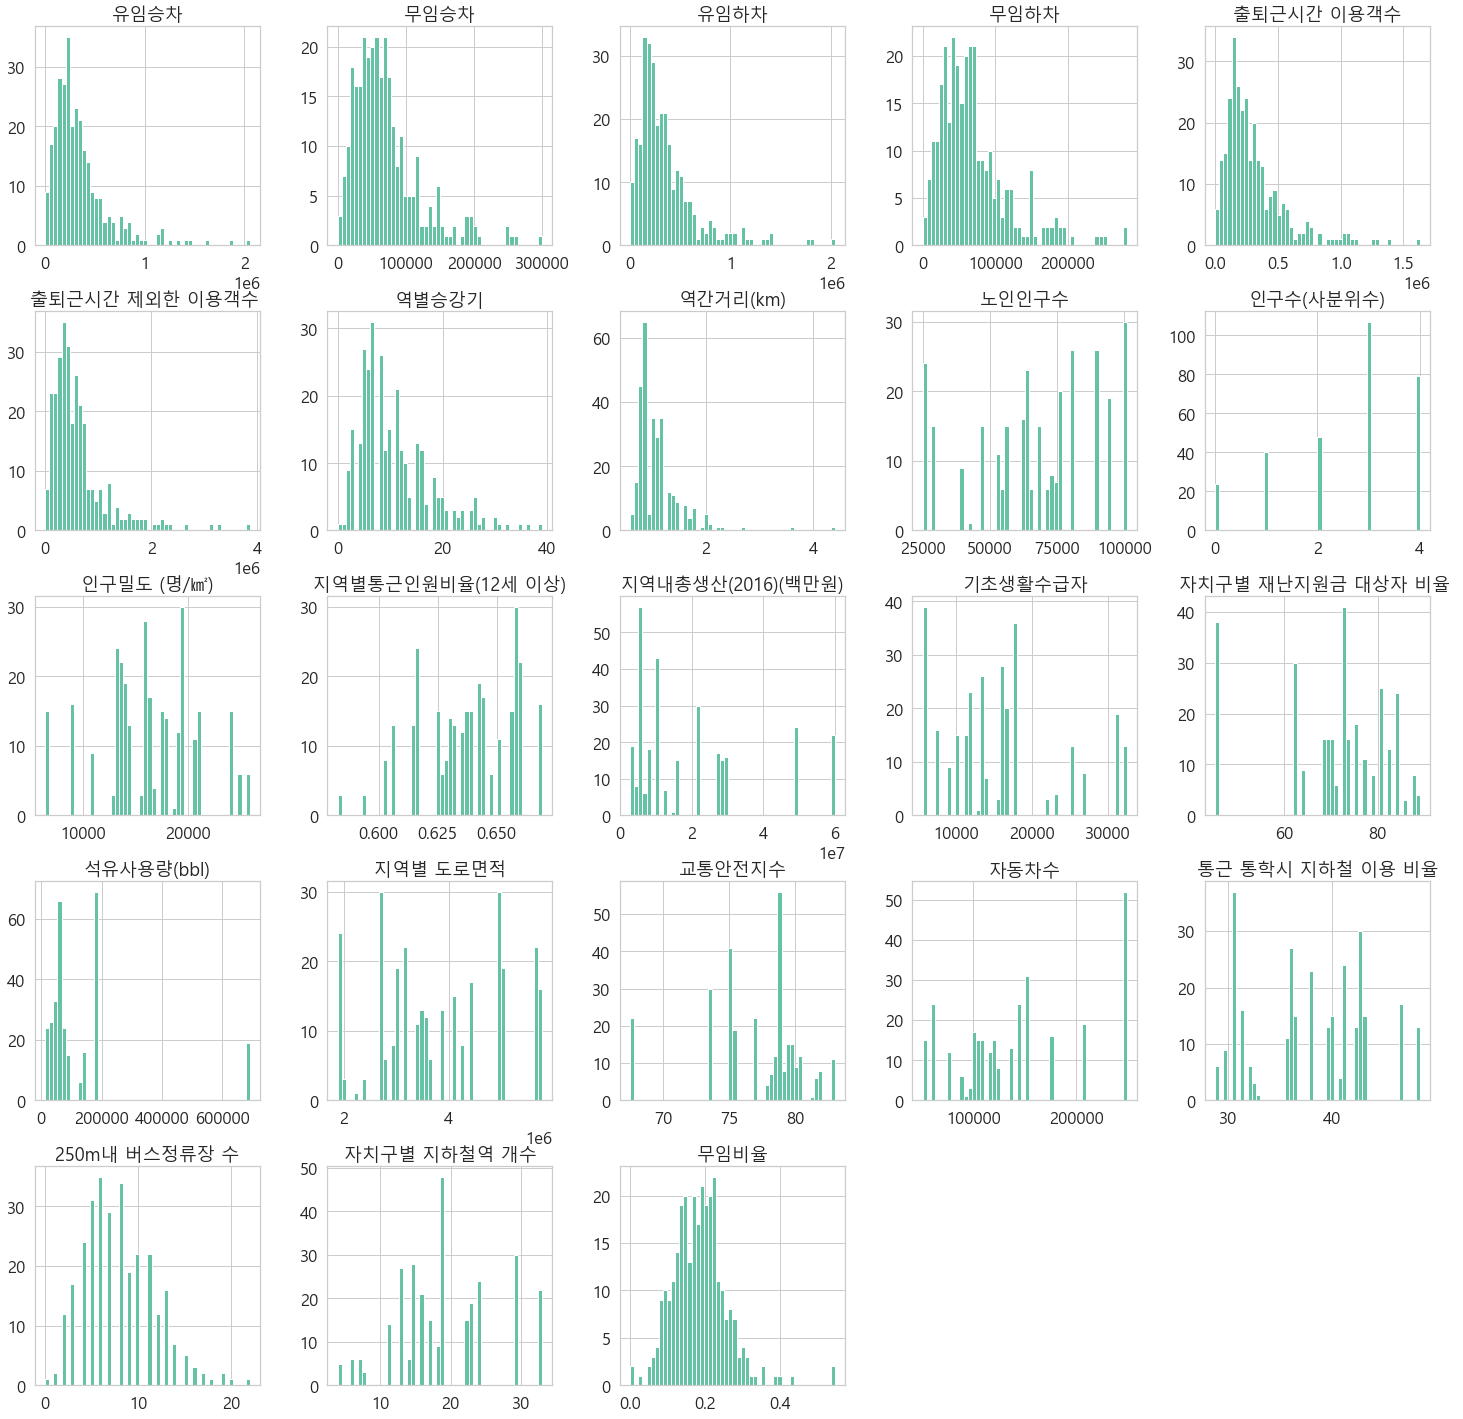

In [26]:
# 모든 column hist
df.hist(bins=50, figsize=(25,25));